As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [31]:
file = pd.read_csv("C:\\Users\\fprie\\OneDrive\\Dokumente\\GitHub\\IH_RH_DA_FT_OCT_2022\\Class_Materials\\Case_Studies\\Customer_Analysis_Case_Study\\Data\\Data_Marketing_Customer_Analysis_Round3.csv")

In [32]:
file

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [33]:
file.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,8011.906727,51750.243989,93.190196,15.144073,48.100571,0.384975,2.980821,434.227243
std,6877.557889,24778.053035,34.413111,10.086110,27.934300,0.910210,2.399497,292.550878
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4014.000000,29335.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5776.000000,50398.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8991.000000,72131.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [34]:
numerical = file.iloc[:,[1,9,12,13,14,15,16,21]].reset_index(drop=True)
categorical = file.iloc[:,[0,2,3,4,5,6,7,8,10,11,17,18,19,20,22,23]].reset_index(drop=True)
cols = numerical.columns
cols.map(str)
print(cols)
length = (len(cols))

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


Text(0.5, 1.0, 'total_claim_amount')

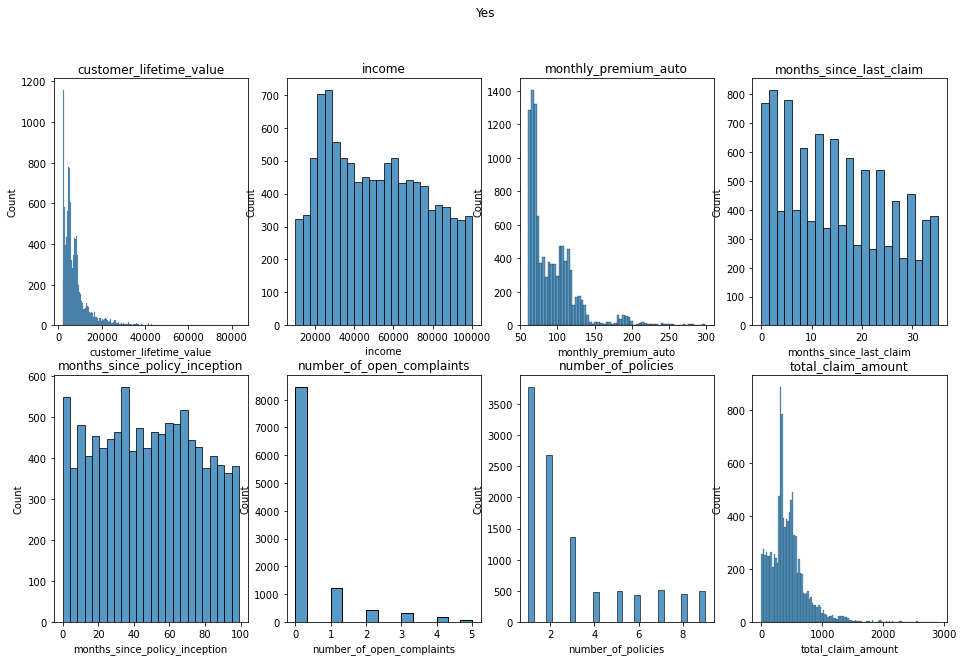

In [64]:
#initialize figure and axes
fig, axes = plt.subplots(2,4 ,figsize = (16,10))
fig.suptitle('Yes')
sns.histplot(ax=axes[0, 0], data=numerical, x="customer_lifetime_value")
sns.histplot(ax=axes[0, 1], data=numerical, x="income")
sns.histplot(ax=axes[0, 2], data=numerical, x="monthly_premium_auto")
sns.histplot(ax=axes[0, 3], data=numerical, x="months_since_last_claim")
sns.histplot(ax=axes[1, 0], data=numerical, x="months_since_policy_inception")
sns.histplot(ax=axes[1, 1], data=numerical, x="number_of_open_complaints")
sns.histplot(ax=axes[1, 2], data=numerical, x="number_of_policies")
sns.histplot(ax=axes[1, 3], data=numerical, x="total_claim_amount")

axes[0, 0].set_title("customer_lifetime_value")
axes[0, 1].set_title("income")
axes[0, 2].set_title("monthly_premium_auto")
axes[0, 3].set_title("months_since_last_claim")
axes[1, 0].set_title("months_since_policy_inception")
axes[1, 1].set_title("number_of_open_complaints")
axes[1, 2].set_title("number_of_policies")
axes[1, 3].set_title("total_claim_amount")

<AxesSubplot:>

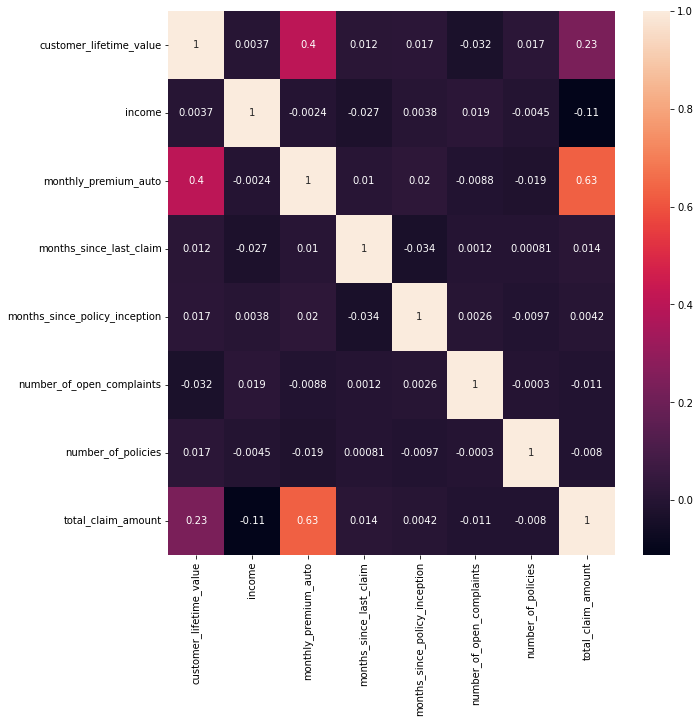

In [63]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(file.corr(),annot=True)